In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("retail_sales_data.csv") 

In [2]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [3]:
df = pd.read_csv("retail_sales_data.csv", parse_dates = ['invoice_date'])

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '16/05/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '24/10/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '24/05/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '13/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\ASUS\anaconda3\lib\site

In [4]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [6]:
df.isna ().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [7]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [8]:
df.drop(["invoice_no", "customer_id", "gender", "age", "payment_method"], axis=1, inplace=True)
df.head()

,category,quantity,price,invoice_date,shopping_mall
0,Clothing,5,1500.40,2022-05-08,Kanyon
1,Shoes,3,1800.51,2021-12-12,Forum Istanbul
2,Clothing,1,300.08,2021-09-11,Metrocity
3,Shoes,5,3000.85,2021-05-16,Metropol AVM
4,Books,4,60.60,2021-10-24,Kanyon


In [9]:
df['Sales'] = df['quantity']*df['price']
df.head()

,category,quantity,price,invoice_date,shopping_mall,Sales
0,Clothing,5,1500.40,2022-05-08,Kanyon,7502.00
1,Shoes,3,1800.51,2021-12-12,Forum Istanbul,5401.53
2,Clothing,1,300.08,2021-09-11,Metrocity,300.08
3,Shoes,5,3000.85,2021-05-16,Metropol AVM,15004.25
4,Books,4,60.60,2021-10-24,Kanyon,242.40


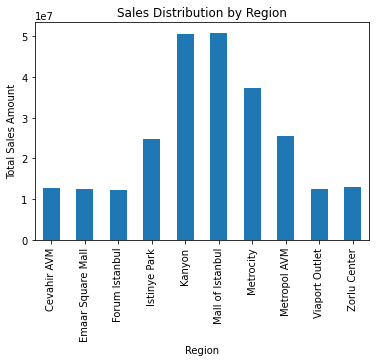

In [10]:
# Group data by region and calculate total sales amount 
region_sales= df.groupby("shopping_mall") ["Sales"].sum()
region_sales.plot(kind="bar")
plt.title("Sales Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales Amount")
plt.show()

In [11]:
print (f" The top-performing region is: {region_sales. idxmax()}")

 The top-performing region is: Mall of Istanbul


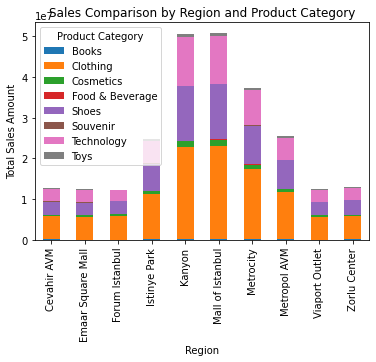

In [12]:
#Stacked bar plot to compare sales amounts across regions and categories
region_category_sales= df.groupby(["shopping_mall", "category"]) ["Sales"].sum().unstack()
region_category_sales.plot(kind="bar", stacked=True)
plt.title("Sales Comparison by Region and Product Category")
plt.xlabel("Region")
plt.ylabel("Total Sales Amount")
plt.legend (title="Product Category")
plt.show()